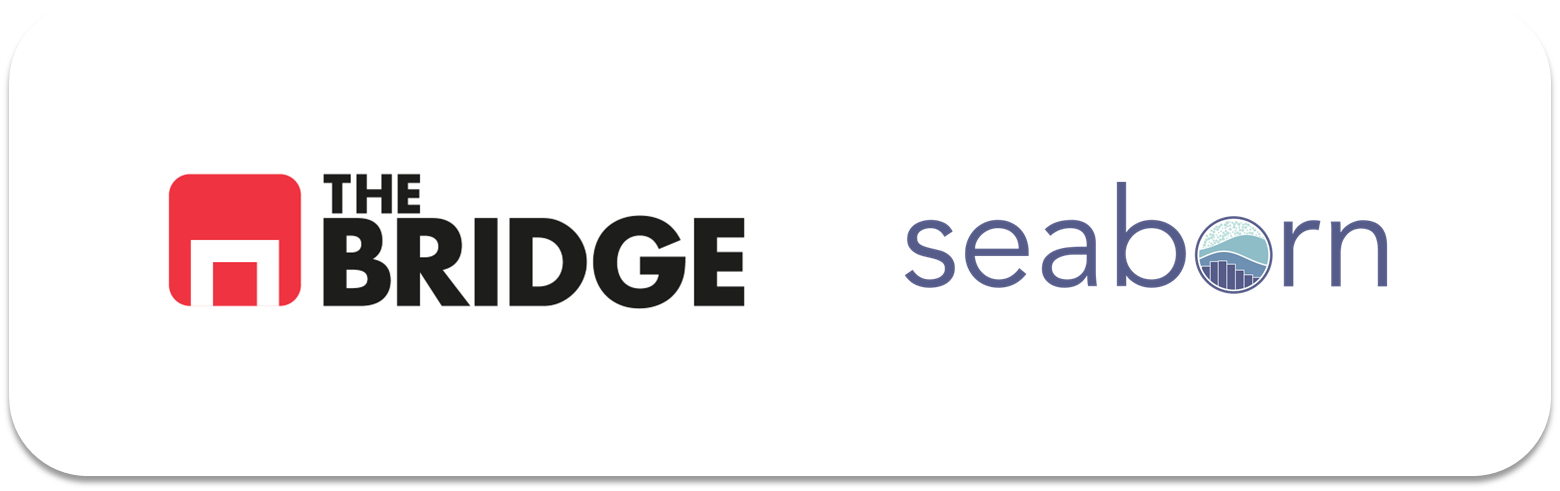

# Visualización Aplicada: Comparando más de dos variables

Como la combinatoria se nos va de las manos, vamos a considerar unos cuantos casos y dejamos a lo que has aprendido y a tu "creatividad" y "sentido común" escoger la combinación de visualizaciones más adecuada para esta situación. Eso sí, como siempre arrancamos con imports y dataframes:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")
df_vuelos = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")


Para esta sesión veremos:
- Mapas de Calor
- Comparación simultánea de Correlaciones
- Gráficos de Burbuja con 3 y 4 dimensiones
- (Graficos de líneas comparativas)
- (Catplot de varias variables categóricas y dos numéricas)

* **Consideraciones generales**: Cuando entramos en análisis multivariante, en general, no haremos todas las combinaciones posibles sino que buscaremos ya una serie de combinaciones dirigidas por nuestras hipótesis. Entre otras cosas porque los anáisis visuales se hacen muy complicados y en términos de presentación, "demasiado informativos", suelen estar muy bien para exposición de datos, o para tenerlos guardados para dar apoyo. Así que la consideración general es salvo que lo exiga tu presentació cuida muy mucho de usarlos o haz como en el análisis no enseñes todas las combinaciones posibles, filtra, quedate solo con las que realmente den respaldo al mensaje a transmitir.


* **Cuándo**: 
    1. En análisis de forma selectiva, casi todos (aunque los mapas de calor y las dispersiones comparativas son casi obligatorias por lo sencillas de obtener y lo visualmente informativas), teniendo en cuenta las consideraciones generales.
    2. En presentaciones... Si puedes, crea las visualizaciones y luego simplificalas (quita valores, "ensombrece" los datos no significativos, quedata con una porción de la visuailización) hasta que sean un apoyo y no una distracción. Pueden llegar a ser visualmente muy atractivos pero recuerda que si ese no es el objetivo de la presentación, no debes emplearlos.
  
* **Cuándo no**: Cuando distraigan, cuando desenfoquen o cuando de verlos de una sola tacada no se deduzca el mensaje al que acompañan.

### Mapas de Calor

Recuperamos rapidamente lo que ya vimos en la unidad de análisis multivariante mostrando el mapa de calor de la matriz de correlación de variables dos a dos.

In [5]:
matriz_corr = df_vuelos.corr(numeric_only= True)

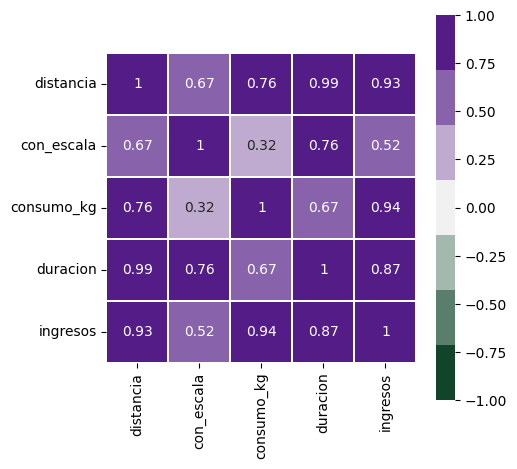

In [6]:

plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

Recuerda que si ya es difícil ver mapas de calor con las tablas de contingencia de variables categóricas de más de 3 valores por variable, cuando tengamos más de 3 variables numéricas a comparar se va a hacer igual de difícil. Despeja el mapa:

(np.float64(0.0), np.float64(5.0), np.float64(5.0), np.float64(0.0))

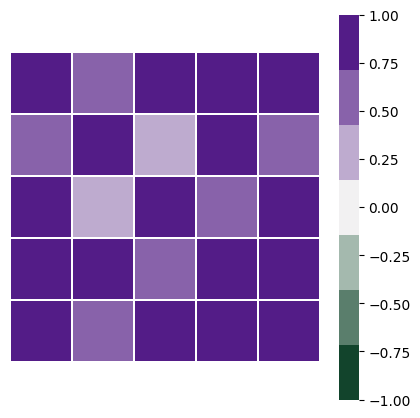

In [7]:

plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=False);

plt.axis("off")


### Comparación simulatánea de correlaciones

Rapidamente, también recordamos nuestro pairplot:

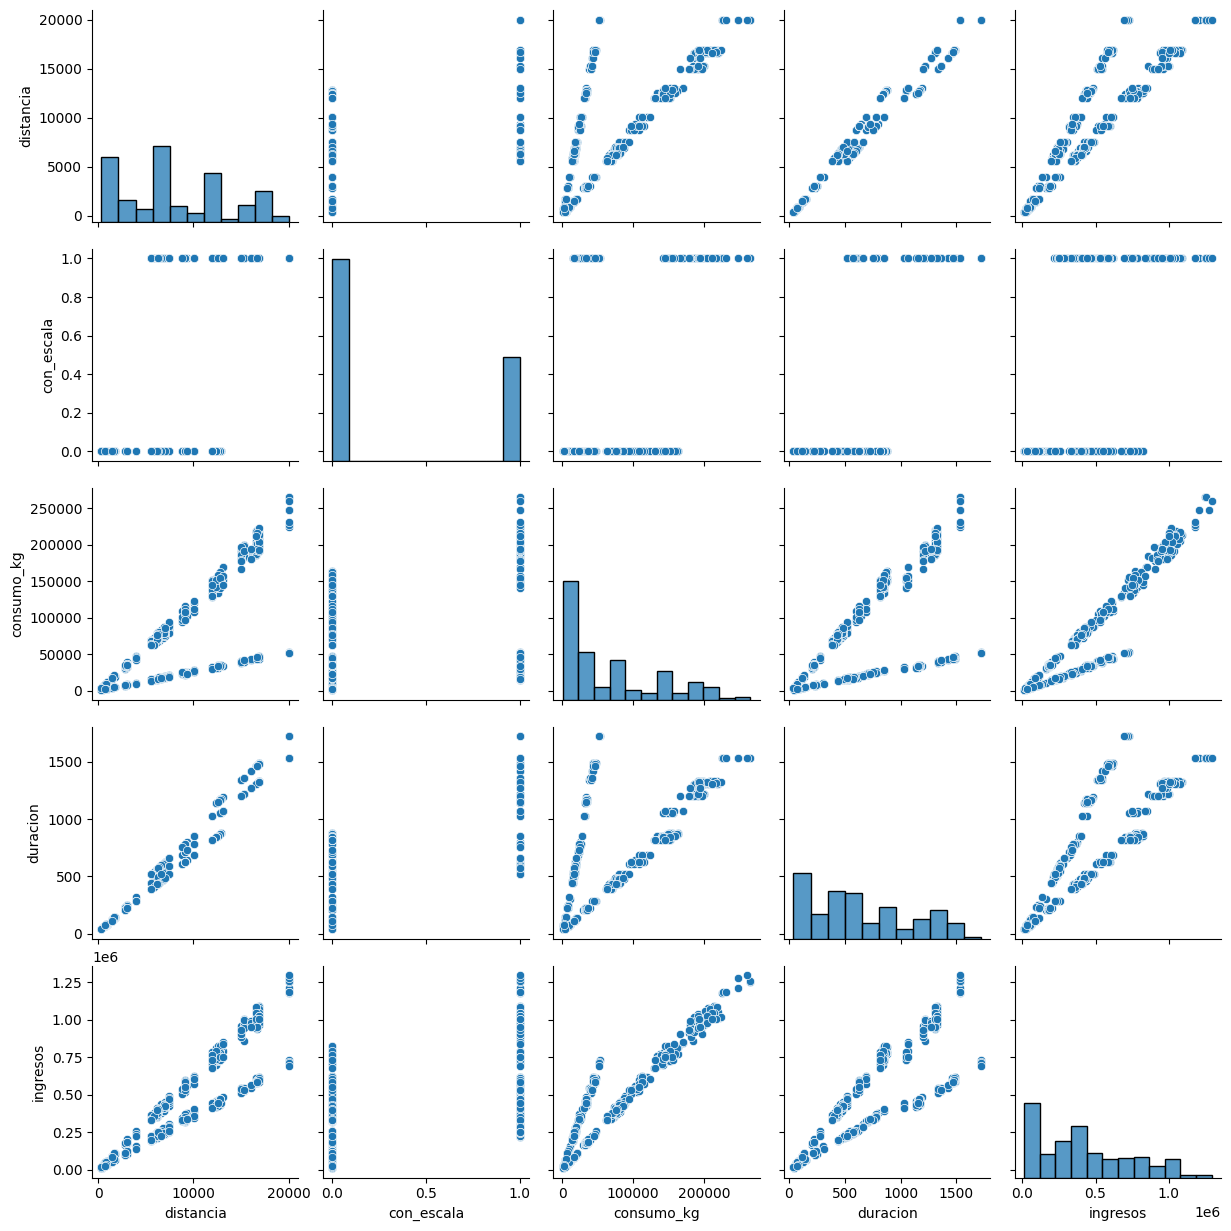

In [8]:
sns.pairplot(df_vuelos);

Y para que veas que puede llegar a ser abrumador para el análisis e imposible para la visualización:

In [ ]:
sns.pairplot(df_seguros)


### Burbujas con 3 y 4 dimensiones


Para casi terminar, los diagramas de burbujas permiten mostrar hasta cuatro variables: una en x, otra en y, otra asociada al tamaño de los puntos y otra asociada a los colores

#### Burbujas con 3 dimensiones: Ingresos, distancia, consumo:

In [ ]:
sns.scatterplot(x="distancia", y= "consumo_kg", size = df_vuelos["ingresos"]/1000, data = df_vuelos);

#### Burbujas con 4 dimensiones: Ingresos, distancia, consumo por compañía aérea

In [ ]:
sns.scatterplot(x="distancia", y= "consumo_kg", size = df_vuelos["ingresos"]/1000, data = df_vuelos, hue = "aircompany");

Para el análisis pueden servirnos bastante como discriminador y guía para ahondar en análisis más dirigidos. Como visaulización descriptiva resumen mucha información, pero... para presentaciones... tienes que manejarlos con cuidado (o hacer la presentación solo en torno a este diagrama)


### Bonus

Para terminar, un par de gráficas que permite seaborn jugando con el set de colores:

#### Análisis de tres variables categóricas con catplot

In [ ]:
sns.catplot(x= "alive", col = "class", hue = "who", data = df_titanic, kind = "count")

#### Análisis de tres variables: dos categóricas, una numérica (strip plot)

In [ ]:


sns.catplot(x = "alive", y = "age", hue = "who", data = df_titanic, kind = "strip");

#### Análisis de tres variables: dos categóricas, una numérica (boxplot plot)


In [ ]:

sns.catplot(x = "alive", y = "age", hue = "who", data = df_titanic, kind = "box");